# Denver Crime Data Analysis 


This project aims to analyze Crime Data in the **City of Denver** from **2017 - 2022**.  

In this project I have used a dataset from Kaggle:
> - [Kaggle dataset](https://www.kaggle.com/datasets/paultimothymooney/denver-crime-data?resource=download)

Contact me at h2fatima@uwaterloo.ca for any further questions/concerns. Analysis inpiration taken from Alaa Mohamed's analysis on Mtl Crime data - https://github.com/alaa-mohamedahmed

## Questions

1. Which Denver neighbourhoods have a higher number of reported crimes?
2. Most frequent crimes by neighbourhood
3. Number of reported crimes committed annualy in Denver
4. What are the general trends in the reported crimes from 2017-2022?
5. On what days and months are a higher number of crimes reported?

## Notebook Content

1. **Step 1:** Install + Import Necessary Libraries
2. **Step 2:** Reading + Exploring Data
3. **Step 3:** Data Cleaning + Preprocessing
4. **Step 4:** Data Analysis + Visualization
5. **2015- 2021 Crime Data Analysis Final Results**

## Step 1: Install + Import Necessary Libraries

In [35]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2: Reading + Exploring Data

In [37]:
# Try reading the CSV file with 'ISO-8859-1' encoding
data = pd.read_csv('crime.csv', encoding='ISO-8859-1')

In [38]:
data.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,2017421909,2017421909299900,2999,0,criminal-mischief-other,public-disorder,6/25/2017 8:40:00 PM,NaN,6/27/2017 7:01:00 PM,2920 W 32ND AVE,3133773.0,1702660.0,-105.024167,39.761646,1,113,highland,1,0,1
1,2017342682,2017342682299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:00:00 PM,NaN,5/26/2017 11:04:00 PM,13400 E ALBROOK DR,3185904.0,1709037.0,-104.838576,39.778256,5,521,montbello,1,0,1
2,2017421829,2017421829299900,2999,0,criminal-mischief-other,public-disorder,6/27/2017 4:40:00 PM,NaN,6/27/2017 5:50:00 PM,1600 BLOCK 16TH ST,3140436.0,1699005.0,-105.000538,39.751514,6,612,union-station,1,0,1
3,2017342681,2017342681299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:01:00 PM,NaN,5/26/2017 10:21:00 PM,2200 BLOCK MARKET ST,3143338.0,1700561.0,-104.990186,39.755741,6,612,five-points,1,0,1
4,2017448789,2017448789299900,2999,0,criminal-mischief-other,public-disorder,7/7/2017 9:48:00 PM,NaN,7/7/2017 9:48:00 PM,1733 N GROVE ST,3132994.0,1696487.0,-105.027052,39.744711,1,121,west-colfax,1,0,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399572 entries, 0 to 399571
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             399572 non-null  int64  
 1   offense_id              399572 non-null  int64  
 2   OFFENSE_CODE            399572 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  399572 non-null  int64  
 4   OFFENSE_TYPE_ID         399572 non-null  object 
 5   OFFENSE_CATEGORY_ID     399572 non-null  object 
 6   FIRST_OCCURRENCE_DATE   399572 non-null  object 
 7   LAST_OCCURRENCE_DATE    205232 non-null  object 
 8   REPORTED_DATE           399572 non-null  object 
 9   INCIDENT_ADDRESS        394012 non-null  object 
 10  GEO_X                   394012 non-null  float64
 11  GEO_Y                   394012 non-null  float64
 12  GEO_LON                 394012 non-null  float64
 13  GEO_LAT                 394012 non-null  float64
 14  DISTRICT_ID         

## Step 3: Cleaning + Preprocessing

In [40]:
data.columns

Index(['incident_id', 'offense_id', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'VICTIM_COUNT'],
      dtype='object')

In [41]:
data.columns

Index(['incident_id', 'offense_id', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'VICTIM_COUNT'],
      dtype='object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399572 entries, 0 to 399571
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             399572 non-null  int64  
 1   offense_id              399572 non-null  int64  
 2   OFFENSE_CODE            399572 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  399572 non-null  int64  
 4   OFFENSE_TYPE_ID         399572 non-null  object 
 5   OFFENSE_CATEGORY_ID     399572 non-null  object 
 6   FIRST_OCCURRENCE_DATE   399572 non-null  object 
 7   LAST_OCCURRENCE_DATE    205232 non-null  object 
 8   REPORTED_DATE           399572 non-null  object 
 9   INCIDENT_ADDRESS        394012 non-null  object 
 10  GEO_X                   394012 non-null  float64
 11  GEO_Y                   394012 non-null  float64
 12  GEO_LON                 394012 non-null  float64
 13  GEO_LAT                 394012 non-null  float64
 14  DISTRICT_ID         

### Step 3.2: Converting datatypes to required format

"Date" column is currently in string format, and we need it to be in datetime format in order to perform analysis.

In [43]:
data['REPORTED_DATE'] = pd.to_datetime(data['REPORTED_DATE'])

/var/folders/yv/yf_6fsf54990hy1gksh202p80000gn/T/ipykernel_28737/1464054650.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['REPORTED_DATE'] = pd.to_datetime(data['REPORTED_DATE'])


In [44]:
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
incident_id,int64
offense_id,int64
OFFENSE_CODE,int64
OFFENSE_CODE_EXTENSION,int64
OFFENSE_TYPE_ID,object
OFFENSE_CATEGORY_ID,object
FIRST_OCCURRENCE_DATE,object
LAST_OCCURRENCE_DATE,object
REPORTED_DATE,datetime64[ns]


### Step 3.3: Checking for null values

In [45]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
incident_id,0
offense_id,0
OFFENSE_CODE,0
OFFENSE_CODE_EXTENSION,0
OFFENSE_TYPE_ID,0
OFFENSE_CATEGORY_ID,0
FIRST_OCCURRENCE_DATE,0
LAST_OCCURRENCE_DATE,194340
REPORTED_DATE,0


Dataset doesn't include null values.

## Step 4: Data Analysis + Visualization

### Question 1: Which neighbourhoods have the highest number of reported crimes?

In [46]:
top_neighbourhood = pd.DataFrame(data['NEIGHBORHOOD_ID'].value_counts()).rename({"NEIGHBORHOOD_ID":"Case Reported"}, axis = 1).rename_axis("NEIGHBORHOOD_ID").head(10)

top_neighbourhood.style.bar()

,count
NEIGHBORHOOD_ID,
five-points,24246
central-park,17202
capitol-hill,15500
cbd,15238
union-station,13090
montbello,12350
civic-center,10732
gateway-green-valley-ranch,10367
dia,10096


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


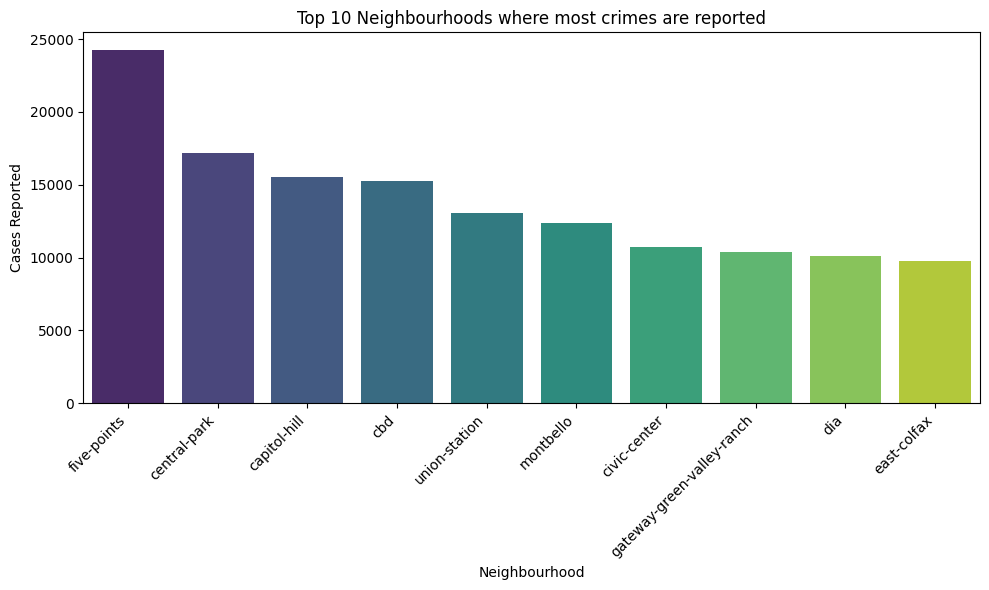

In [47]:
top_neighbourhood = top_neighbourhood.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_neighbourhood, x=top_neighbourhood.index, y='count', palette='viridis')

plt.xlabel('Neighbourhood')
plt.ylabel('Cases Reported')
plt.title('Top 10 Neighbourhoods where most crimes are reported')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

#### Analysis shows that the neighbourhoods with highest number of reported crimes in Montreal between 2015 - 2021 are:

1. Five Points (total of 24246 reported crimes)
2. Central Park (total of 17202 reported crimes)
3. Capitol Hill (total of 15500 reported crimes)
4. Cbd (total of 15238 reported crimes)
5. Union Station (total of 13090 reported crimes)
6. Montbello (total of 12350 reported crimes)
7. Civic Center (total of 10732 reported crimes)
8. Gateway Green Valley Ranch (total of 10367 reported crimes)
9. Dia (total of 10096 reported crimes)
10. East-Colfax (total of 9775 reported crimes)

### Question 2: What are the most frequent crimes by neighbourhood?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


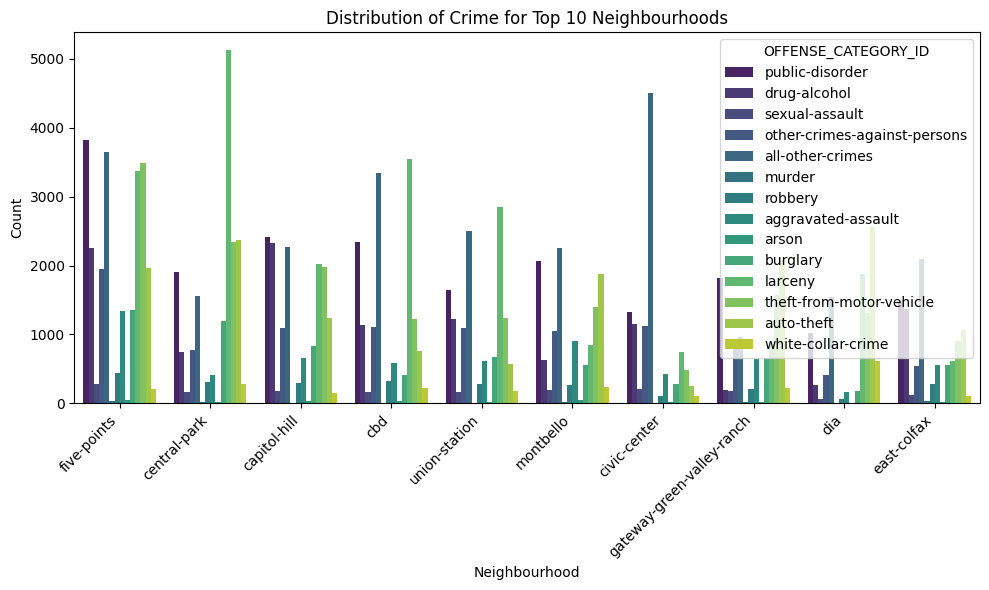

In [48]:
# Calculate the top 10 neighbourhoods with highest crime rate
top_neighbourhoods = data['NEIGHBORHOOD_ID'].value_counts().head(10).index

# Filter the data to include only the top 10 neighbourhoods
data_top_neighbourhoods = data[data['NEIGHBORHOOD_ID'].isin(top_neighbourhoods)]

# Get the order of neighborhoods by crime count in descending order
neighbourhood_order = data_top_neighbourhoods.groupby('NEIGHBORHOOD_ID')['OFFENSE_CATEGORY_ID'].count().sort_values(ascending=False).index

# Create a count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data_top_neighbourhoods, x='NEIGHBORHOOD_ID', hue='OFFENSE_CATEGORY_ID', palette='viridis', order=neighbourhood_order)

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Crime for Top 10 Neighbourhoods')

# Slightly rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

**Burgalry and larceny** are the most reported type of crime in most neighbourhoods, except in **Five Points, Civic-Center and Montbello**; where **Public disorder and all other crimes** has a higher rate. 

### Question 3: Number of reported crimes committed annualy in Denver

In [49]:

# Extract year from REPORTED_DATE
data['Year'] = pd.to_datetime(data['REPORTED_DATE']).dt.year

# Count occurrences of each year
year_counts = data['Year'].value_counts().reset_index().rename(columns={'Year': 'Case Reported', 'index': 'Year'})

# Now you have a DataFrame with year-wise counts
print(year_counts)

   Case Reported  count
0           2021  77767
1           2020  68060
2           2022  64238
3           2018  63888
4           2019  62900
5           2017  62719


 we can see that **2021 had the highest number of reported crimes (77767) while 2017 had the lowest number of reported crimes (62719).**

### Question 4: What are the general trends in the reported crimes between 2017-2022

>1. What are the trends in the categories of reported crimes?
>2. Did crime rates increase or decrease?

#### 1. What are the trends in the categories of reported crimes?

**Public disorders, burglary, and motor vehicle related thefts** have increased over the years from 2017-2022. **All other crimes against persons** have decreased over the years

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

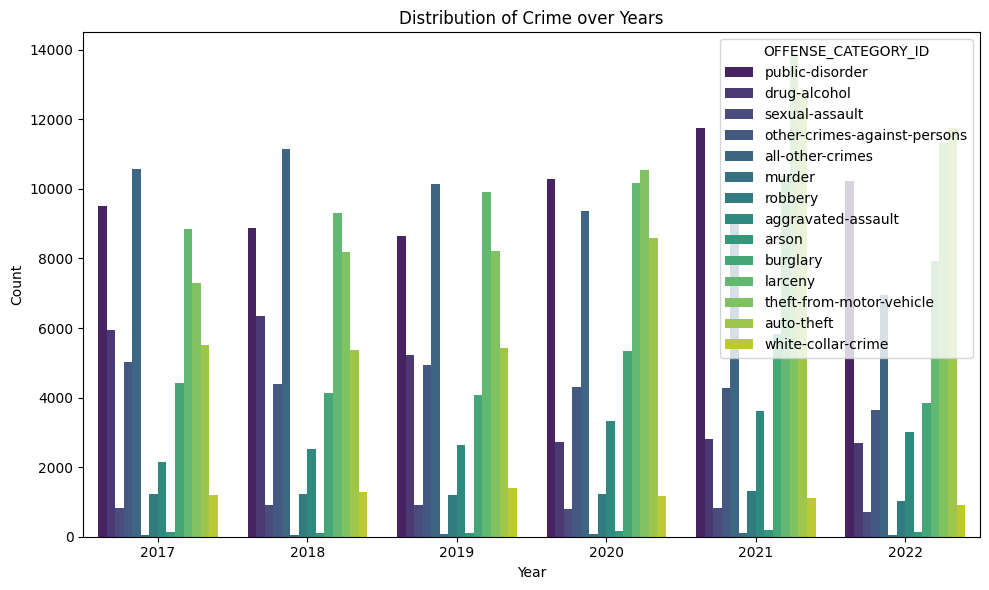

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Year', hue='OFFENSE_CATEGORY_ID', palette='viridis')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Crime over Years')

# Display the plot
plt.tight_layout()
plt.show()

#### 2. Did crime rates increase or decrease?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

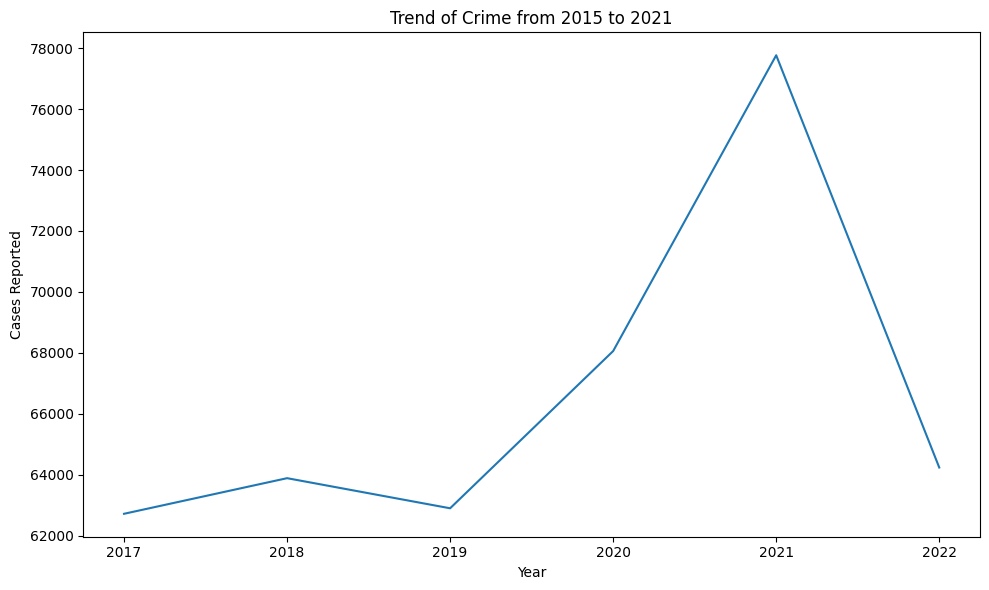

In [51]:
# Calculate the year-wise trend of crime rates
year_wise_trend = data.groupby('Year').sum(numeric_only=True).drop(['GEO_LON', 'GEO_LAT'], axis=1).rename({'count': 'IS_CRIME'}, axis=1)

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_wise_trend, x=year_wise_trend.index, y='IS_CRIME')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cases Reported')
plt.title('Trend of Crime from 2015 to 2021')

# Display the plot
plt.tight_layout()
plt.show()

We can see that crime reports **spiked** from in 2021 but fell again in 2022.

### Question 5: On what days and months are a higher number of crimes reported?

#### Let's explore the types of crime committed depending on the day of the week.

In [52]:
# Convert the 'date' column to datetime format
data['REPORTED_DATE'] = pd.to_datetime(data['REPORTED_DATE'])

# Extract the month and day of the week
data['Month'] = data['REPORTED_DATE'].apply(lambda time: time.month)
data['Day of Week'] = data['REPORTED_DATE'].apply(lambda time: time.dayofweek)

# Mapping day of the week to its name
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
data['Day of Week'] = data['Day of Week'].map(day_mapping)

# Now, 'Month' and 'Day of Week' columns will contain the extracted values
print(data)

        incident_id        offense_id  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0        2017421909  2017421909299900          2999                       0   
1        2017342682  2017342682299900          2999                       0   
2        2017421829  2017421829299900          2999                       0   
3        2017342681  2017342681299900          2999                       0   
4        2017448789  2017448789299900          2999                       0   
...             ...               ...           ...                     ...   
399567   2022510783  2022510783240400          2404                       0   
399568   2022510866  2022510866240400          2404                       0   
399569   2022510341  2022510341250100          2501                       0   
399570   2022510188  2022510188260500          2605                       0   
399571   2022510146  2022510146260600          2606                       0   

                 OFFENSE_TYPE_ID OFFENSE_CATEGORY_I

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

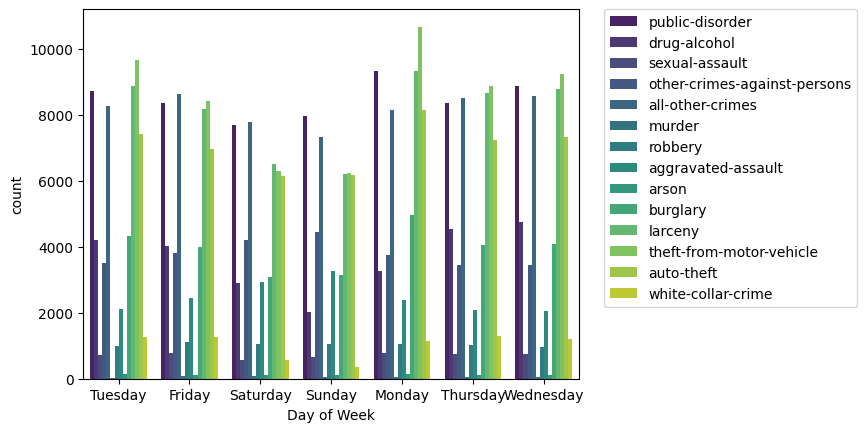

In [53]:
sns.countplot(x='Day of Week',data=data,hue='OFFENSE_CATEGORY_ID',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can see that **Monday** has the highest rate of _theft from motor vehicles and public disorder_.

**Saturday** and **Sunday** have the lowest number of _theft from motor vehicles_.

#### Let's explore the types of crime committed depending on the month of the year.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

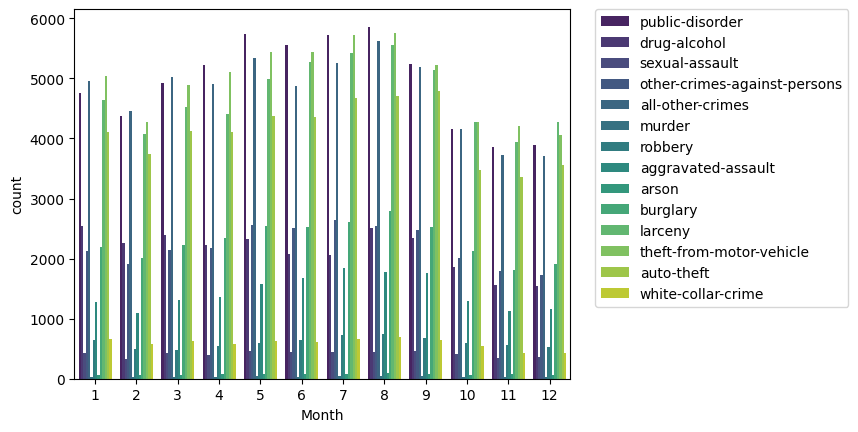

In [54]:
sns.countplot(x='Month', data=data, hue='OFFENSE_CATEGORY_ID', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The rate of crime type stays consistent throughout the months but it is shown that the summer months have more crimes than the winter months


#### Let's explore the overall correlation between the time of year and the reported number of crimes between 2015-2021.

Which days/months have the highest number of total reported crimes?

In [55]:
data.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT,Year,Month,Day of Week
0,2017421909,2017421909299900,2999,0,criminal-mischief-other,public-disorder,6/25/2017 8:40:00 PM,NaN,2017-06-27 19:01:00,2920 W 32ND AVE,...,39.761646,1,113,highland,1,0,1,2017,6,Tuesday
1,2017342682,2017342682299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:00:00 PM,NaN,2017-05-26 23:04:00,13400 E ALBROOK DR,...,39.778256,5,521,montbello,1,0,1,2017,5,Friday
2,2017421829,2017421829299900,2999,0,criminal-mischief-other,public-disorder,6/27/2017 4:40:00 PM,NaN,2017-06-27 17:50:00,1600 BLOCK 16TH ST,...,39.751514,6,612,union-station,1,0,1,2017,6,Tuesday
3,2017342681,2017342681299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:01:00 PM,NaN,2017-05-26 22:21:00,2200 BLOCK MARKET ST,...,39.755741,6,612,five-points,1,0,1,2017,5,Friday
4,2017448789,2017448789299900,2999,0,criminal-mischief-other,public-disorder,7/7/2017 9:48:00 PM,NaN,2017-07-07 21:48:00,1733 N GROVE ST,...,39.744711,1,121,west-colfax,1,0,1,2017,7,Friday


In [56]:
#correlation between days/months

dayMonth = data.groupby(by=['Day of Week', 'Month']).count()['OFFENSE_CATEGORY_ID'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Friday,4802,4191,4872,5017,5176,5259,5640,5570,5364,4318,3913,4011
Monday,5279,4590,5190,5432,5716,5544,6140,6301,5510,4530,4756,4124
Saturday,4213,3829,4106,4221,4494,4590,4761,4773,4594,3808,3319,3211
Sunday,3925,3592,3832,3996,4724,4238,4760,4797,4492,3772,3402,3511
Thursday,4936,4391,4988,5064,5369,5447,5456,5707,5529,4220,3643,4190


<Axes: xlabel='Month', ylabel='Day of Week'>

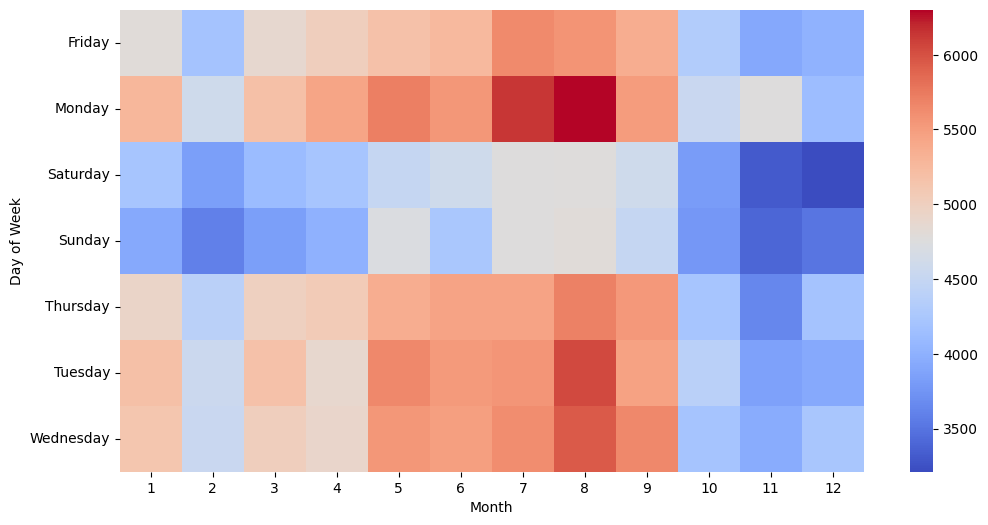

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

Overall, **Monday** has the _highest_ number of reported crimes in the period between 2017-2022, followed by **Tuesday and Wednesday.**

We can also see that **June, July and August** have _higher_ numbers of reported crimes.

## 2017 - 2022 Denver Crime Data Analysis Final Results

1. Neighbourhoods with highest number of reported crimes: 
    - Five Points
    - Central Park 
    - Capitol Hill
2. Mondays have the highest number of reported crimes, followed by Tuesday and Wednesday, there is less crime on the weekends
3. August is the month with most number of reported crimes, followed by July and June, the winter months show lower reported crimes
4. Burglary, larcency, and public disorder are the most reported crime, followed by theft in/from a motor vehice
5. 2021 had the highest crime rate (77,767 cases), and 2017 the lowest (62,719 cases). 
6. Overall, crime reports increase from 2017 to 2021 where reports spiked, then fell in 2022.